# reinitiated_SoB

# Source of Business (Re-Inititated)

##### Source of Business looks at patients who have just started taking specific drugs and how many are switching from one drug to another. 

 How: 
- Select a cohort of patients. For example, select all the patients that have been diagnosed with a certain disease for the first time within a time interval (e.g., three months).
- Follow the diagnoses and treatment patterns of the cohort.
- Identify the progression of the treatment (e.g., add on, switch away, switch to).

### SQL1

The query below creates a table 'FROM_MED' that selects all the patients that have been diagnosed with MDD_PPD_GAUCHER for the first time with the time frame of 01-01-2022 to 01-15-2022. This time frame can be changed depending on the need to change the size of the cohort.

The results of this query are then stored in a pandas dataframe 'df_1'

In [130]:
CREATE OR REPLACE TABLE FROM_MED as SELECT D_PATIENT_ID, DATE_OF_SERVICE, NAME, PATIENT_GENDER_CODE, PATIENT_ZIP3, PATIENT_STATE, PATIENT_AMOUNT_PAID, PRIMARY_AMOUNT_PAID, SECONDARY_AMOUNT_PAID, TOTAL_AMOUNT_PAID, PATIENT_BIRTH_YEAR, PRIMARY_HCP_STATE, PRIMARY_HCP_ZIP_CODE, D_PRESCRIBER_ID, PRIMARY_HCP_SPECIALTY, DAYS_SUPPLY, NUMBER_OF_REFILLS_AUTHORIZED
FROM (SELECT *, ROW_NUMBER () OVER(PARTITION BY D_PATIENT_ID ORDER BY DATE_OF_SERVICE) AS rn
FROM (SELECT med.D_PATIENT_ID, med.DATE_OF_SERVICE, med.PATIENT_GENDER_CODE, med.PATIENT_ZIP3, med.PATIENT_STATE, med.PATIENT_AMOUNT_PAID, med.PRIMARY_AMOUNT_PAID, med.SECONDARY_AMOUNT_PAID, med.TOTAL_AMOUNT_PAID, med.PATIENT_BIRTH_YEAR, med.PRIMARY_HCP_STATE, med.PRIMARY_HCP_ZIP_CODE, med.D_PRESCRIBER_ID, med.PRIMARY_HCP_SPECIALTY, med.DAYS_SUPPLY, med.NUMBER_OF_REFILLS_AUTHORIZED, ndc.NAME FROM DEFAULT.COMPILE_BK.MDD_GAUCHER_PPD_COMBINED_CLAIM_NDC AS med JOIN DEFAULT.COMPILE_BK.MDD_GAUCHER_PPD_NDCCODE AS ndc ON med."D_PRODUCT_NDC" = ndc."NORMALIZED_CODE" WHERE LOWER(ndc.NAME) LIKE ANY ( '%auvelity%', '%viibryd%', '%fetzima%', '%brintellix%' , '%trintellix%', '%rexulti%' , '%spravato%' , '%wellbutrin%' ) and med.DATE_OF_SERVICE between '2022-01-01' and '2022-01-15' ORDER BY med.D_PATIENT_ID, med.DATE_OF_SERVICE DESC)) WHERE rn = 1;

SELECT D_PATIENT_ID, DATE_OF_SERVICE, NAME FROM FROM_MED;

D_PATIENT_ID 
 DATE_OF_SERVICE 
 NAME 
 
 
 
 
 0 
 61bc725e1f36ee6692ef5ba3800efc742255408f166017... 
 2022-01-05 
 TRINTELLIX 
 
 
 1 
 61bd3731eebfc3006ea729c666c95767288b6e89007a06... 
 2022-01-10 
 SPRAVATO 
 
 
 2 
 61bd61b6317a56a8c382d7f9493ad172461fe67547a7c9... 
 2022-01-15 
 TRINTELLIX 
 
 
 3 
 61bdef1d1f7196186c130d22711464aa752d35b7870dc2... 
 2022-01-11 
 REXULTI 
 
 
 4 
 61be0974860321a6d6999cc426ea2023ee5382fb5ee63a... 
 2022-01-07 
 VIIBRYD 
 
 
 ... 
 ... 
 ... 
 ... 
 
 
 44479 
 263d73a1312868dfab717af5a6799c42f2d7ddcbe80535... 
 2022-01-08 
 FETZIMA 
 
 
 44480 
 263fd640571aeaf5f1434b52585df9032e3931053571ee... 
 2022-01-15 
 TRINTELLIX 
 
 
 44481 
 26414742ab5362e7fc3507601646e7e57996637cc39682... 
 2022-01-08 
 VIIBRYD 
 
 
 44482 
 2643fafaa58369433fb90f6b90ecb1adf7017bdd0592c3... 
 2022-01-13 
 VIIBRYD 
 
 
 44483 
 2644a4415b3ddad67595a243e4c37c19ec9d56589b526f... 
 2022-01-03 
 TRINTELLIX 
 
 
 
 44484 rows × 3 columns

### SQL2 

The query below creates a table 'TO_MED' that follows the diagnoses and treatment patterns of the cohort that was earlier created. As of now, I am following the diagnoses and treatment for the cohort from 01-01-2022 to 12-31-2022. This time frame can be changed depending on the need. 

The results of this query are then stored in a pandas dataframe 'df_2'

In [112]:
CREATE OR REPLACE TABLE TO_MED as (SELECT med.D_PATIENT_ID, med.DATE_OF_SERVICE, med.NAME, med.PATIENT_GENDER_CODE, med.PATIENT_ZIP3, med.PATIENT_AMOUNT_PAID, med.PRIMARY_AMOUNT_PAID, med.SECONDARY_AMOUNT_PAID, med.TOTAL_AMOUNT_PAID, med.PATIENT_BIRTH_YEAR, med.PRIMARY_HCP_STATE, med.PRIMARY_HCP_ZIP_CODE, med.D_PRESCRIBER_ID, med.PRIMARY_HCP_SPECIALTY, med.DAYS_SUPPLY, med.NUMBER_OF_REFILLS_AUTHORIZED FROM FROM_MED LEFT JOIN (SELECT med.D_PATIENT_ID, med.DATE_OF_SERVICE, ndc.NAME, med.PATIENT_GENDER_CODE, med.PATIENT_ZIP3, med.PATIENT_AMOUNT_PAID, med.PRIMARY_AMOUNT_PAID, med.SECONDARY_AMOUNT_PAID, med.TOTAL_AMOUNT_PAID, med.PATIENT_BIRTH_YEAR, med.PRIMARY_HCP_STATE, med.PRIMARY_HCP_ZIP_CODE, med.D_PRESCRIBER_ID, med.PRIMARY_HCP_SPECIALTY, med.DAYS_SUPPLY, med.NUMBER_OF_REFILLS_AUTHORIZED FROM DEFAULT.COMPILE_BK.MDD_GAUCHER_PPD_COMBINED_CLAIM AS med JOIN DEFAULT.COMPILE_BK.MDD_GAUCHER_PPD_NDCCODE AS ndc ON med."D_PRODUCT_NDC" = ndc."NORMALIZED_CODE" WHERE LOWER(ndc.NAME) LIKE ANY ( '%auvelity%', '%viibryd%', '%fetzima%', '%brintellix%' , '%trintellix%', '%rexulti%' , '%spravato%' , '%wellbutrin%' ) ORDER BY med.D_PATIENT_ID, med.DATE_OF_SERVICE) as med ON FROM_MED.D_PATIENT_ID = med.D_PATIENT_ID  where med.DATE_OF_SERVICE between '2022-01-01' and '2022-12-31');

-- DELETE FROM TO_MED as t1 using FROM_MED as t2 where t1.date_of_service = t2.date_of_service and t1.d_patient_id = t2.d_patient_id and t1.name = t2.name;

SELECT D_PATIENT_ID, DATE_OF_SERVICE, NAME FROM TO_MED;

D_PATIENT_ID 
 DATE_OF_SERVICE 
 NAME 
 
 
 
 
 0 
 ee582b03cd0a8846caf4cc0d63af69006539b378fd1de7... 
 2022-08-10 
 VIIBRYD 
 
 
 1 
 ee582b03cd0a8846caf4cc0d63af69006539b378fd1de7... 
 2022-09-09 
 VIIBRYD 
 
 
 2 
 ee582b03cd0a8846caf4cc0d63af69006539b378fd1de7... 
 2022-10-09 
 VIIBRYD 
 
 
 3 
 ee582b03cd0a8846caf4cc0d63af69006539b378fd1de7... 
 2022-11-12 
 VIIBRYD 
 
 
 4 
 ee58f850b5ff2987626322c2a88b4eaa3e06afd01fc0c4... 
 2022-01-11 
 TRINTELLIX 
 
 
 ... 
 ... 
 ... 
 ... 
 
 
 339538 
 30ba3b445e1d8e4a14dad3d0a43d67f274a9a1adcb92b0... 
 2022-04-10 
 REXULTI 
 
 
 339539 
 30ba3b445e1d8e4a14dad3d0a43d67f274a9a1adcb92b0... 
 2022-04-14 
 TRINTELLIX 
 
 
 339540 
 30ba3b445e1d8e4a14dad3d0a43d67f274a9a1adcb92b0... 
 2022-05-05 
 REXULTI 
 
 
 339541 
 30ba3b445e1d8e4a14dad3d0a43d67f274a9a1adcb92b0... 
 2022-05-07 
 TRINTELLIX 
 
 
 339542 
 30ba3b445e1d8e4a14dad3d0a43d67f274a9a1adcb92b0... 
 2022-06-06 
 REXULTI 
 
 
 
 339543 rows × 3 columns

In [3]:
# importing necessary libraries 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [114]:
# concatenating df_1 and df_2

jan_cohort = df_2

In [115]:
# sorting the concatenated data based on D_PATIENT_ID and DATE_OF_SERVICE

jan_cohort = jan_cohort.sort_values(by=['D_PATIENT_ID', 'DATE_OF_SERVICE'],ignore_index=True)

In [116]:

# checking the data types

jan_cohort.dtypes

In [117]:
# converting the data type to datetime for DATE_OF_SERVICE 

jan_cohort['DATE_OF_SERVICE'] = pd.to_datetime(jan_cohort['DATE_OF_SERVICE'])

In [118]:
#checking all the unique drugs 
jan_cohort['NAME'].unique()

In [119]:
# replacing all 'WELLBUTRIN SR' and 'WELLBUTRIN XL' with 'WELLBUTRIN' in dataframe

jan_cohort.loc[jan_cohort['NAME'] == 'WELLBUTRIN SR', 'NAME'] = 'WELLBUTRIN'
jan_cohort.loc[jan_cohort['NAME'] == 'WELLBUTRIN XL', 'NAME'] = 'WELLBUTRIN'

## Re-Intiated

For the above patients look back (e.g., 12 months) and label the patients as “Re-Initiated” if they had not taken any of the medications in the market definition, in the previous period but had taken it within previous look back period
I have considered the previous period of 90 days. 

In [120]:
# creating seperate data frames for all the drugs jan that consists of jan_cohort(for the specific drug)  data along with jan_cohort data (for that specific durg) that is shifted by one row

jan_REXULTI = pd.concat([jan_cohort.loc[(jan_cohort['NAME'] == 'REXULTI')], jan_cohort.loc[(jan_cohort['NAME'] == 'REXULTI')].shift(-1).rename(columns={"D_PATIENT_ID": "D_PATIENT_ID_shift", "DATE_OF_SERVICE": "DATE_OF_SERVICE_shift", "NAME": "NAME_shift"})], axis=1)

jan_VIIBRYD = pd.concat([jan_cohort.loc[(jan_cohort['NAME'] == 'VIIBRYD')], jan_cohort.loc[(jan_cohort['NAME'] == 'VIIBRYD')].shift(-1).rename(columns={"D_PATIENT_ID": "D_PATIENT_ID_shift", "DATE_OF_SERVICE": "DATE_OF_SERVICE_shift", "NAME": "NAME_shift"})], axis=1)

jan_TRINTELLIX = pd.concat([jan_cohort.loc[(jan_cohort['NAME'] == 'TRINTELLIX')], jan_cohort.loc[(jan_cohort['NAME'] == 'TRINTELLIX')].shift(-1).rename(columns={"D_PATIENT_ID": "D_PATIENT_ID_shift", "DATE_OF_SERVICE": "DATE_OF_SERVICE_shift", "NAME": "NAME_shift"})], axis=1)

jan_SPRAVATO = pd.concat([jan_cohort.loc[(jan_cohort['NAME'] == 'SPRAVATO')], jan_cohort.loc[(jan_cohort['NAME'] == 'SPRAVATO')].shift(-1).rename(columns={"D_PATIENT_ID": "D_PATIENT_ID_shift", "DATE_OF_SERVICE": "DATE_OF_SERVICE_shift", "NAME": "NAME_shift"})], axis=1)

jan_FETZIMA = pd.concat([jan_cohort.loc[(jan_cohort['NAME'] == 'FETZIMA')], jan_cohort.loc[(jan_cohort['NAME'] == 'FETZIMA')].shift(-1).rename(columns={"D_PATIENT_ID": "D_PATIENT_ID_shift", "DATE_OF_SERVICE": "DATE_OF_SERVICE_shift", "NAME": "NAME_shift"})], axis=1)

jan_AUVELITY = pd.concat([jan_cohort.loc[(jan_cohort['NAME'] == 'AUVELITY')], jan_cohort.loc[(jan_cohort['NAME'] == 'AUVELITY')].shift(-1).rename(columns={"D_PATIENT_ID": "D_PATIENT_ID_shift", "DATE_OF_SERVICE": "DATE_OF_SERVICE_shift", "NAME": "NAME_shift"})], axis=1)

jan_BRINTELLIX = pd.concat([jan_cohort.loc[(jan_cohort['NAME'] == 'BRINTELLIX')], jan_cohort.loc[(jan_cohort['NAME'] == 'BRINTELLIX')].shift(-1).rename(columns={"D_PATIENT_ID": "D_PATIENT_ID_shift", "DATE_OF_SERVICE": "DATE_OF_SERVICE_shift", "NAME": "NAME_shift"})], axis=1)

jan_WELLBUTRIN = pd.concat([jan_cohort.loc[(jan_cohort['NAME'] == 'WELLBUTRIN')], jan_cohort.loc[(jan_cohort['NAME'] == 'WELLBUTRIN')].shift(-1).rename(columns={"D_PATIENT_ID": "D_PATIENT_ID_shift", "DATE_OF_SERVICE": "DATE_OF_SERVICE_shift", "NAME": "NAME_shift"})], axis=1)

In [121]:
print('number of patients for REXULTI: ' , len(jan_REXULTI['D_PATIENT_ID'].unique()))

print('number of patients for VIIBRYD: ' , len(jan_VIIBRYD['D_PATIENT_ID'].unique()))

print('number of patients for TRINTELLIX: ' , len(jan_TRINTELLIX['D_PATIENT_ID'].unique()))

print('number of patients for SPRAVATO: ' , len(jan_SPRAVATO['D_PATIENT_ID'].unique()))

print('number of patients for FETZIMA: ' , len(jan_FETZIMA['D_PATIENT_ID'].unique()))

print('number of patients for AUVELITY: ' , len(jan_AUVELITY['D_PATIENT_ID'].unique()))

print('number of patients for BRINTELLIX: ' , len(jan_BRINTELLIX['D_PATIENT_ID'].unique()))

print('number of patients for WELLBUTRIN: ' , len(jan_WELLBUTRIN['D_PATIENT_ID'].unique()))



number of patients for REXULTI:  10825
number of patients for VIIBRYD:  12549
number of patients for TRINTELLIX:  20501
number of patients for SPRAVATO:  1222
number of patients for FETZIMA:  1511
number of patients for AUVELITY:  29
number of patients for BRINTELLIX:  5
number of patients for WELLBUTRIN:  2122


In [122]:
# counting the refill days 

jan_REXULTI['refill_days'] = np.where(jan_REXULTI['D_PATIENT_ID']!= jan_REXULTI['D_PATIENT_ID_shift'], 0 , (jan_REXULTI['DATE_OF_SERVICE_shift'] - jan_REXULTI['DATE_OF_SERVICE']).dt.days)

jan_VIIBRYD['refill_days'] = np.where(jan_VIIBRYD['D_PATIENT_ID']!= jan_VIIBRYD['D_PATIENT_ID_shift'], 0, (jan_VIIBRYD['DATE_OF_SERVICE_shift'] - jan_VIIBRYD['DATE_OF_SERVICE']).dt.days)

jan_TRINTELLIX['refill_days'] = np.where(jan_TRINTELLIX['D_PATIENT_ID']!= jan_TRINTELLIX['D_PATIENT_ID_shift'], 0, (jan_TRINTELLIX['DATE_OF_SERVICE_shift'] - jan_TRINTELLIX['DATE_OF_SERVICE']).dt.days)

jan_SPRAVATO['refill_days'] = np.where(jan_SPRAVATO['D_PATIENT_ID']!= jan_SPRAVATO['D_PATIENT_ID_shift'], 0, (jan_SPRAVATO['DATE_OF_SERVICE_shift'] - jan_SPRAVATO['DATE_OF_SERVICE']).dt.days)

jan_FETZIMA['refill_days'] = np.where(jan_FETZIMA['D_PATIENT_ID']!= jan_FETZIMA['D_PATIENT_ID_shift'], 0, (jan_FETZIMA['DATE_OF_SERVICE_shift'] - jan_FETZIMA['DATE_OF_SERVICE']).dt.days)

jan_AUVELITY['refill_days'] = np.where(jan_AUVELITY['D_PATIENT_ID']!= jan_AUVELITY['D_PATIENT_ID_shift'], 0, (jan_AUVELITY['DATE_OF_SERVICE_shift'] - jan_AUVELITY['DATE_OF_SERVICE']).dt.days)

jan_BRINTELLIX['refill_days'] = np.where(jan_BRINTELLIX['D_PATIENT_ID']!= jan_BRINTELLIX['D_PATIENT_ID_shift'], 0, (jan_BRINTELLIX['DATE_OF_SERVICE_shift'] - jan_BRINTELLIX['DATE_OF_SERVICE']).dt.days)

jan_WELLBUTRIN['refill_days'] = np.where(jan_WELLBUTRIN['D_PATIENT_ID']!= jan_WELLBUTRIN['D_PATIENT_ID_shift'], 0, (jan_WELLBUTRIN['DATE_OF_SERVICE_shift'] - jan_WELLBUTRIN['DATE_OF_SERVICE']).dt.days)

In [123]:
jan_REXULTI['reinitiated'] = np.where(jan_REXULTI['refill_days'] > 90 , 'Y' , 'N')

jan_VIIBRYD['reinitiated'] = np.where(jan_VIIBRYD['refill_days'] > 90 , 'Y' , 'N')

jan_TRINTELLIX['reinitiated'] = np.where(jan_TRINTELLIX['refill_days'] > 90 , 'Y' , 'N')

jan_SPRAVATO['reinitiated'] = np.where(jan_SPRAVATO['refill_days'] > 90 , 'Y' , 'N')

jan_FETZIMA['reinitiated'] = np.where(jan_FETZIMA['refill_days'] > 90 , 'Y' , 'N')

jan_AUVELITY['reinitiated'] = np.where(jan_AUVELITY['refill_days'] > 90 , 'Y' , 'N')

jan_BRINTELLIX['reinitiated'] = np.where(jan_BRINTELLIX['refill_days'] > 90 , 'Y' , 'N')

jan_WELLBUTRIN['reinitiated'] = np.where(jan_WELLBUTRIN['refill_days'] > 90 , 'Y' , 'N')

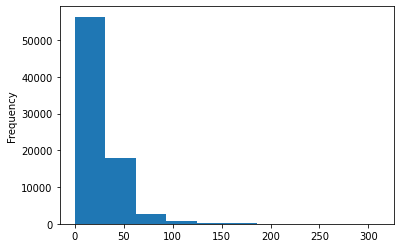

In [124]:
jan_REXULTI['refill_days'].plot(kind='hist')
plt.show()

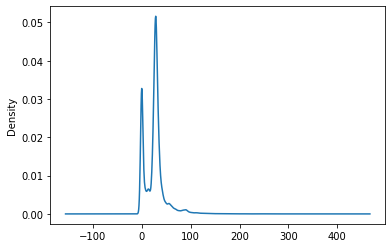

In [125]:
jan_REXULTI['refill_days'].plot(kind='kde')
plt.show()

In [126]:
print('REXULTI reinititated: ' , len(jan_REXULTI[jan_REXULTI['reinitiated'] == 'Y' ]['D_PATIENT_ID'].unique()))

print('VIIBRYD reinititated: ' , len(jan_VIIBRYD[jan_VIIBRYD['reinitiated'] == 'Y' ]['D_PATIENT_ID'].unique()))

print('TRINTELLIX reinititated: ' , len(jan_TRINTELLIX[jan_TRINTELLIX['reinitiated'] == 'Y' ]['D_PATIENT_ID'].unique()))

print('SPRAVATO reinititated: ' , len(jan_SPRAVATO[jan_SPRAVATO['reinitiated'] == 'Y' ]['D_PATIENT_ID'].unique()))

print('FETZIMA reinititated: ' , len(jan_FETZIMA[jan_FETZIMA['reinitiated'] == 'Y' ]['D_PATIENT_ID'].unique()))

print('AUVELITY reinititated: ' , len(jan_AUVELITY[jan_AUVELITY['reinitiated'] == 'Y' ]['D_PATIENT_ID'].unique()))

print('BRINTELLIX reinititated: ' , len(jan_BRINTELLIX[jan_BRINTELLIX['reinitiated'] == 'Y' ]['D_PATIENT_ID'].unique()))

print('WELLBUTRIN reinititated: ' , len(jan_WELLBUTRIN[jan_WELLBUTRIN['reinitiated'] == 'Y' ]['D_PATIENT_ID'].unique()))

REXULTI reinititated:  1353
VIIBRYD reinititated:  1718
TRINTELLIX reinititated:  3398
SPRAVATO reinititated:  105
FETZIMA reinititated:  187
AUVELITY reinititated:  0
BRINTELLIX reinititated:  0
WELLBUTRIN reinititated:  276


# discontinued_SoB

# Source of Business (Discontinued)
##### Source of Business looks at patients who have just started taking specific drugs and how many are switching from one drug to another.

How:

- Select a cohort of patients. For example, select all the patients that have been diagnosed with a certain disease for the first time within a time interval (e.g., three months).
- Follow the diagnoses and treatment patterns of the cohort.
- Identify the progression of the treatment (e.g., add on, switch away, switch to).

In [127]:
from datetime import datetime

In [142]:
jan_REXULTI['discontinued'] = np.where( (jan_REXULTI['D_PATIENT_ID']!= jan_REXULTI['D_PATIENT_ID_shift']) & ((datetime(2022, 12, 31, 0, 0, 0) - (jan_REXULTI['DATE_OF_SERVICE'])).dt.days > 90) , 'Y' , 'N')

jan_VIIBRYD['discontinued'] = np.where( (jan_VIIBRYD['D_PATIENT_ID']!= jan_VIIBRYD['D_PATIENT_ID_shift']) & ((datetime(2022, 12, 31, 0, 0, 0) - (jan_VIIBRYD['DATE_OF_SERVICE'])).dt.days > 90) , 'Y' , 'N')

jan_TRINTELLIX['discontinued'] = np.where( (jan_TRINTELLIX['D_PATIENT_ID']!= jan_TRINTELLIX['D_PATIENT_ID_shift']) & ((datetime(2022, 12, 31, 0, 0, 0) - (jan_TRINTELLIX['DATE_OF_SERVICE'])).dt.days > 90) , 'Y' , 'N')

jan_SPRAVATO['discontinued'] = np.where( (jan_SPRAVATO['D_PATIENT_ID']!= jan_SPRAVATO['D_PATIENT_ID_shift']) & ((datetime(2022, 12, 31, 0, 0, 0) - (jan_SPRAVATO['DATE_OF_SERVICE'])).dt.days > 90) , 'Y' , 'N')

jan_FETZIMA['discontinued'] = np.where( (jan_FETZIMA['D_PATIENT_ID']!= jan_FETZIMA['D_PATIENT_ID_shift']) & ((datetime(2022, 12, 31, 0, 0, 0) - (jan_FETZIMA['DATE_OF_SERVICE'])).dt.days > 90) , 'Y' , 'N')

jan_AUVELITY['discontinued'] = np.where( (jan_AUVELITY['D_PATIENT_ID']!= jan_AUVELITY['D_PATIENT_ID_shift']) & ((datetime(2022, 12, 31, 0, 0, 0) - (jan_AUVELITY['DATE_OF_SERVICE'])).dt.days > 90) , 'Y' , 'N')

jan_BRINTELLIX['discontinued'] = np.where( (jan_BRINTELLIX['D_PATIENT_ID']!= jan_BRINTELLIX['D_PATIENT_ID_shift']) & ((datetime(2022, 12, 31, 0, 0, 0) - (jan_BRINTELLIX['DATE_OF_SERVICE'])).dt.days > 90) , 'Y' , 'N')

jan_WELLBUTRIN['discontinued'] = np.where( (jan_WELLBUTRIN['D_PATIENT_ID']!= jan_WELLBUTRIN['D_PATIENT_ID_shift']) & ((datetime(2022, 12, 31, 0, 0, 0) - (jan_WELLBUTRIN['DATE_OF_SERVICE'])).dt.days > 90) , 'Y' , 'N')

In [143]:
print('REXULTI discontinued: ' , len(jan_REXULTI[jan_REXULTI['discontinued'] == 'Y' ]['D_PATIENT_ID'].unique()))

print('VIIBRYD discontinued: ' , len(jan_VIIBRYD[jan_VIIBRYD['discontinued'] == 'Y' ]['D_PATIENT_ID'].unique()))

print('TRINTELLIX discontinued: ' , len(jan_TRINTELLIX[jan_TRINTELLIX['discontinued'] == 'Y' ]['D_PATIENT_ID'].unique()))

print('SPRAVATO discontinued: ' , len(jan_SPRAVATO[jan_SPRAVATO['discontinued'] == 'Y' ]['D_PATIENT_ID'].unique()))

print('FETZIMA discontinued: ' , len(jan_FETZIMA[jan_FETZIMA['discontinued'] == 'Y' ]['D_PATIENT_ID'].unique()))

print('AUVELITY discontinued: ' , len(jan_AUVELITY[jan_AUVELITY['discontinued'] == 'Y' ]['D_PATIENT_ID'].unique()))

print('BRINTELLIX discontinued: ' , len(jan_BRINTELLIX[jan_BRINTELLIX['discontinued'] == 'Y' ]['D_PATIENT_ID'].unique()))

print('WELLBUTRIN discontinued: ' , len(jan_WELLBUTRIN[jan_WELLBUTRIN['discontinued'] == 'Y' ]['D_PATIENT_ID'].unique()))

REXULTI discontinued:  5403
VIIBRYD discontinued:  10536
TRINTELLIX discontinued:  9886
SPRAVATO discontinued:  787
FETZIMA discontinued:  664
AUVELITY discontinued:  0
BRINTELLIX discontinued:  5
WELLBUTRIN discontinued:  1602


# patient_demographic

In [134]:

SELECT PATIENT_GENDER_CODE, PATIENT_ZIP3, PATIENT_BIRTH_YEAR, PATIENT_STATE FROM FROM_MED

PATIENT_GENDER_CODE 
 PATIENT_ZIP3 
 PATIENT_BIRTH_YEAR 
 PATIENT_STATE 
 
 
 
 
 0 
 F 
 128 
 1972 
 NY 
 
 
 1 
 F 
 275 
 1954 
 NC 
 
 
 2 
 M 
 581 
 1996 
 ND 
 
 
 3 
 F 
 370 
 1979 
 TN 
 
 
 4 
 F 
 216 
 1943 
 MD 
 
 
 ... 
 ... 
 ... 
 ... 
 ... 
 
 
 44479 
 M 
 836 
 2003 
 ID 
 
 
 44480 
 M 
 251 
 1959 
 WV 
 
 
 44481 
 M 
 541 
 1968 
 WI 
 
 
 44482 
 F 
 814 
 1954 
 CO 
 
 
 44483 
 F 
 480 
 1968 
 MI 
 
 
 
 44484 rows × 4 columns

In [107]:
# pip install plotly-express

import plotly.express as px
from datetime import datetime, date
import plotly.figure_factory as ff

In [135]:
patient_state= df_3['PATIENT_STATE'].value_counts().rename_axis('state').reset_index(name='counts')

In [136]:
fig = px.choropleth(patient_state,
                    locations='state', 
                    locationmode="USA-states", 
                    scope="usa",
                    color='counts',
                    color_continuous_scale="Viridis_r"
                    )

fig.update_layout(title_text = 'State-wise patient distribution for January(1-15) cohort',
                  showlegend = True
                  )

fig.show()




In [137]:
today = date.today()

df_3['age'] = today.year - df_3['PATIENT_BIRTH_YEAR']

In [138]:
fig = px.histogram(df_3, x="age", nbins=20)

fig.update_layout(title_text = 'Age-wise patient distribution for January(1-15) cohort')

fig.show()

In [139]:
fig = px.histogram(df_3, x="PATIENT_GENDER_CODE")

fig.update_layout(title_text = 'Gender-wise patient distribution for January(1-15) cohort')

fig.show()

In [140]:
fig = px.histogram(df_3, x="age", nbins=20)

fig.update_layout(title_text = 'Age-wise patient distribution for January(1-15) cohort')

fig.show()

In [141]:
fig = px.histogram(df_3, x="age", color="PATIENT_GENDER_CODE", nbins=20,
                   marginal="box", 
                   hover_data=df_3.columns)

fig.update_layout(title_text = 'Age and Gender wise patient distribution for January(1-15) cohort')

fig.show()

# copay

# prescriber